Veri Yükleme

In [ ]:
import pandas as pd

file_path = "lung_cancer_dataset.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.isnull().sum())
print(df["PULMONARY_DISEASE"].value_counts(normalize=True) * 100)


   AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0   68       1        1                     1              1   
1   81       1        1                     0              0   
2   58       1        1                     0              0   
3   44       0        1                     0              1   
4   72       0        1                     1              1   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                      1                  0     57.831178                0   
1                      1                  1     47.694835                1   
2                      0                  0     59.577435                0   
3                      1                  0     59.785767                0   
4                      1                  1     59.733941                0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0                0                    1                  1       

Data Visualization

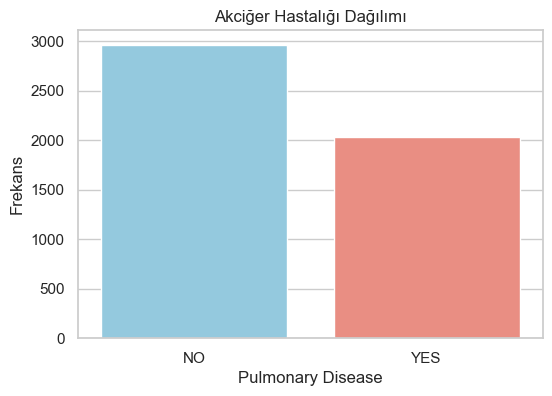

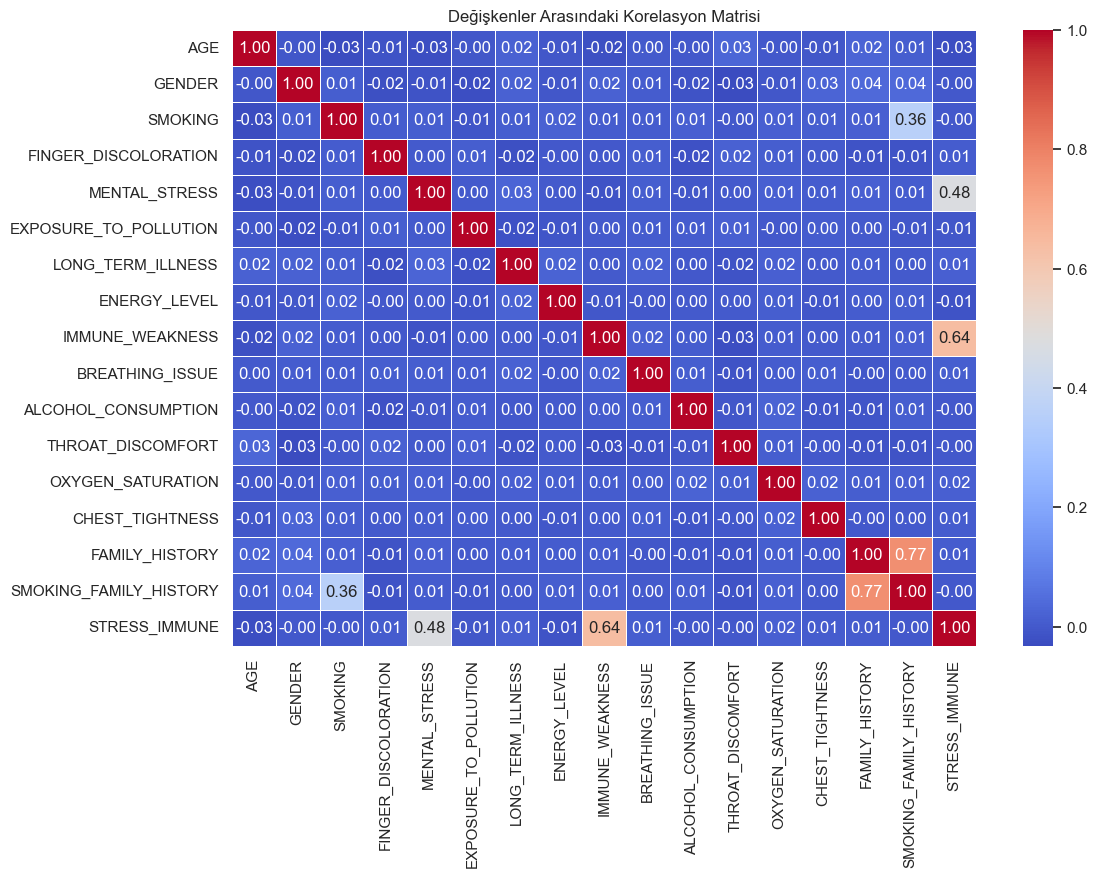

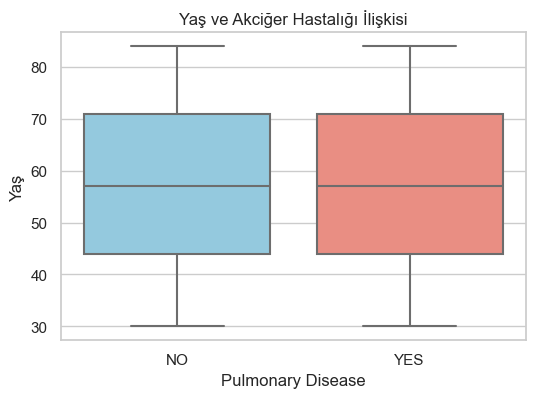

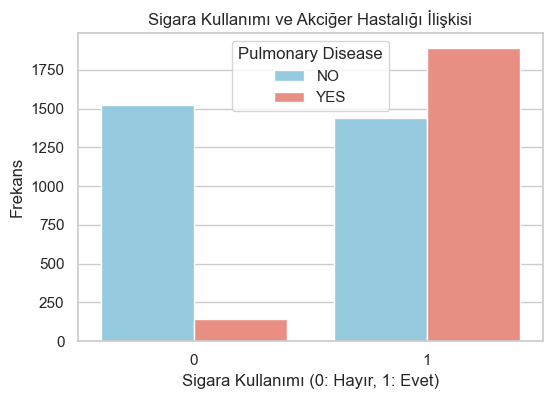

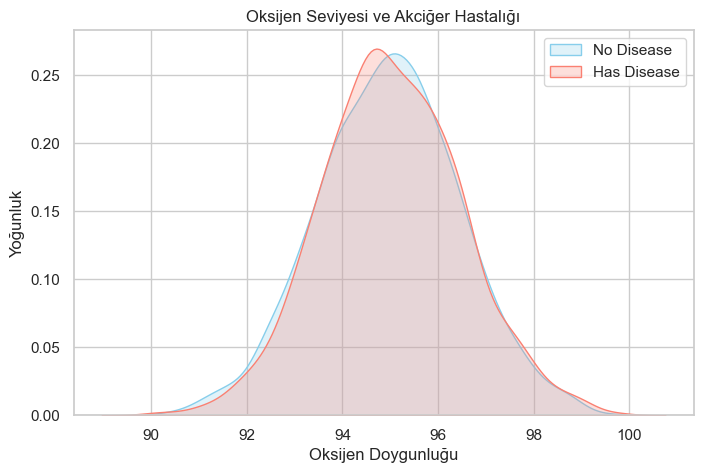

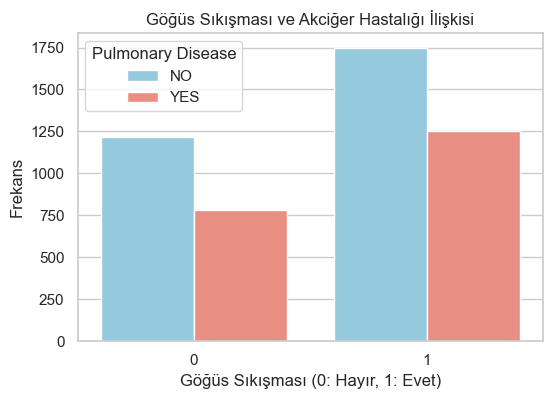

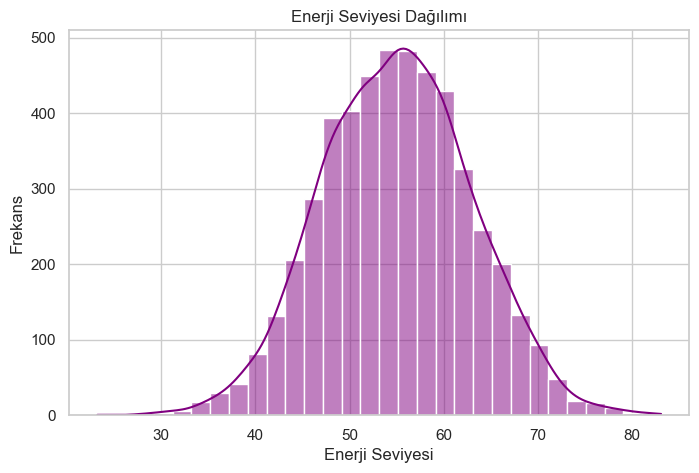

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x=df["PULMONARY_DISEASE"], palette=["skyblue", "salmon"])
plt.title("Akciğer Hastalığı Dağılımı")
plt.xlabel("Pulmonary Disease")
plt.ylabel("Frekans")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["PULMONARY_DISEASE"]).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Değişkenler Arasındaki Korelasyon Matrisi")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["PULMONARY_DISEASE"], y=df["AGE"], palette=["skyblue", "salmon"])
plt.title("Yaş ve Akciğer Hastalığı İlişkisi")
plt.xlabel("Pulmonary Disease")
plt.ylabel("Yaş")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["SMOKING"], hue=df["PULMONARY_DISEASE"], palette=["skyblue", "salmon"])
plt.title("Sigara Kullanımı ve Akciğer Hastalığı İlişkisi")
plt.xlabel("Sigara Kullanımı (0: Hayır, 1: Evet)")
plt.ylabel("Frekans")
plt.legend(title="Pulmonary Disease", labels=["NO", "YES"])
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["PULMONARY_DISEASE"] == "NO"]["OXYGEN_SATURATION"], label="No Disease", fill=True, color="skyblue")
sns.kdeplot(df[df["PULMONARY_DISEASE"] == "YES"]["OXYGEN_SATURATION"], label="Has Disease", fill=True, color="salmon")
plt.title("Oksijen Seviyesi ve Akciğer Hastalığı")
plt.xlabel("Oksijen Doygunluğu")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["CHEST_TIGHTNESS"], hue=df["PULMONARY_DISEASE"], palette=["skyblue", "salmon"])
plt.title("Göğüs Sıkışması ve Akciğer Hastalığı İlişkisi")
plt.xlabel("Göğüs Sıkışması (0: Hayır, 1: Evet)")
plt.ylabel("Frekans")
plt.legend(title="Pulmonary Disease", labels=["NO", "YES"])
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["ENERGY_LEVEL"], kde=True, bins=30, color="purple")
plt.title("Enerji Seviyesi Dağılımı")
plt.xlabel("Enerji Seviyesi")
plt.ylabel("Frekans")
plt.show()


C:\Users\melih\AppData\Local\Temp\ipykernel_24412\3642068220.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=df_categorical["PULMONARY_DISEASE"], y=df_categorical["AGE"], palette=["skyblue", "salmon"])
c:\Users\melih\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\melih\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


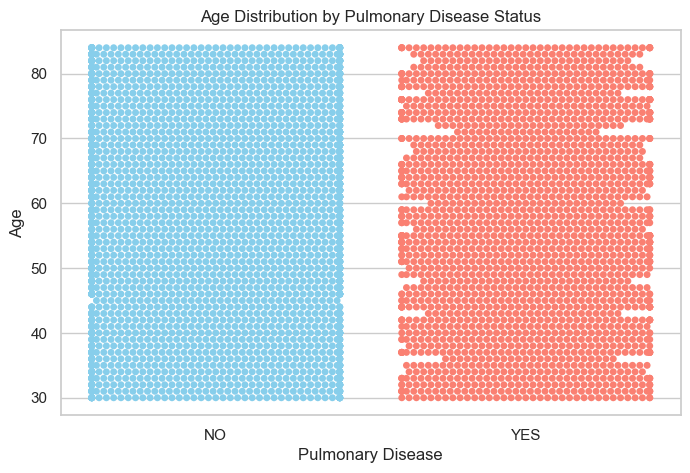

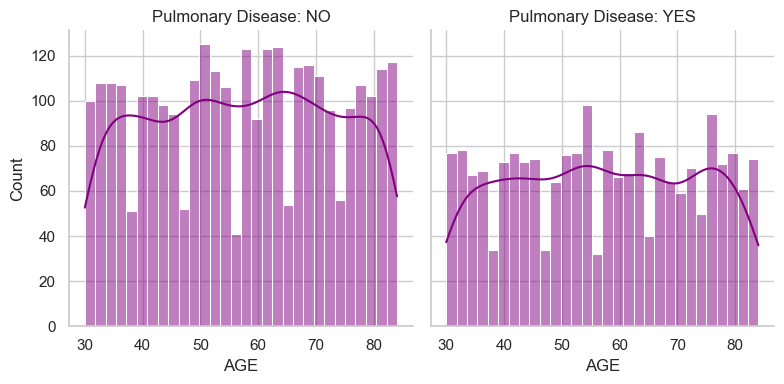

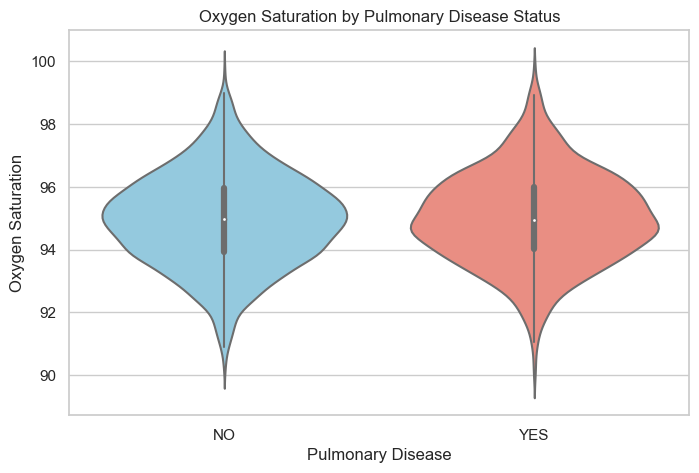

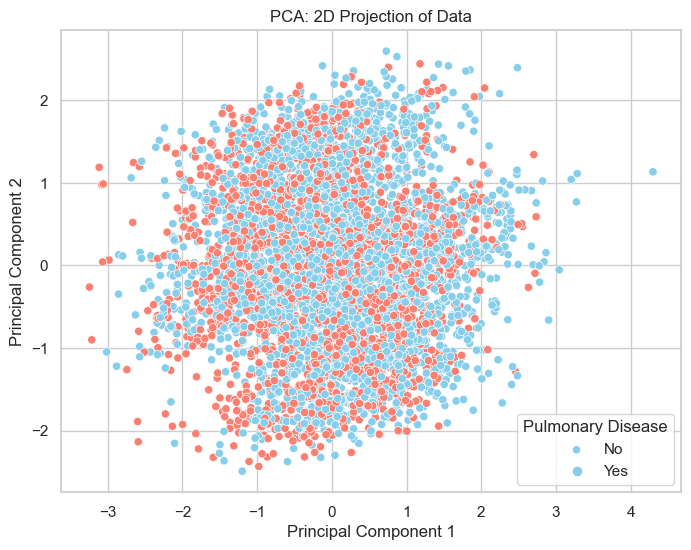

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Kategorik Değişkenleri Düzelt
df_categorical = df.copy()
categorical_cols = ['GENDER', 'SMOKING', 'ALCOHOL_CONSUMPTION', 'STRESS_IMMUNE', 'IMMUNE_WEAKNESS', 
                    'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'PULMONARY_DISEASE']
for col in categorical_cols:
    df_categorical[col] = df_categorical[col].astype(str)

# Label Encoding ile Sayısal Dönüştürme
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

# Yaş Dağılımı - Swarmplot (Alternatif olarak stripplot ekledik)
plt.figure(figsize=(8, 5))
try:
    sns.swarmplot(x=df_categorical["PULMONARY_DISEASE"], y=df_categorical["AGE"], palette=["skyblue", "salmon"])
except:
    sns.stripplot(x=df_categorical["PULMONARY_DISEASE"], y=df_categorical["AGE"], jitter=True, palette=["skyblue", "salmon"])

plt.title("Age Distribution by Pulmonary Disease Status")
plt.xlabel("Pulmonary Disease")
plt.ylabel("Age")
plt.show()

# Akciğer Hastalığı Olan/Olmayan Kişilerin Yaş Dağılımı
categorical_features = ["SMOKING", "ALCOHOL_CONSUMPTION", "EXPOSURE_TO_POLLUTION", "IMMUNE_WEAKNESS"]
g = sns.FacetGrid(df_categorical, col="PULMONARY_DISEASE", height=4, aspect=1)
g.map_dataframe(sns.histplot, x="AGE", kde=True, bins=30, color="purple")
g.set_titles(col_template="Pulmonary Disease: {col_name}")
plt.show()

# Oksijen Seviyesi Dağılımı - Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(x=df_categorical["PULMONARY_DISEASE"], y=df_categorical["OXYGEN_SATURATION"], palette=["skyblue", "salmon"])
plt.title("Oxygen Saturation by Pulmonary Disease Status")
plt.xlabel("Pulmonary Disease")
plt.ylabel("Oxygen Saturation")
plt.show()

# PCA Uygulama
features = ["AGE", "OXYGEN_SATURATION", "ENERGY_LEVEL", "EXPOSURE_TO_POLLUTION"]
X = df_encoded[features]

# Veriyi ölçekleyelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Uygulama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA Görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded["PULMONARY_DISEASE"], palette=["skyblue", "salmon"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection of Data")
plt.legend(title="Pulmonary Disease", labels=["No", "Yes"])
plt.show()


Modeller

Train-Test

In [17]:
from sklearn.model_selection import train_test_split

# Özellikleri ve hedef değişkeni belirleme
X = df_encoded.drop(columns=["PULMONARY_DISEASE"])  # Bağımsız değişkenler
y = df_encoded["PULMONARY_DISEASE"]  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Veri Ölçekleme

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelleri tanımlayalım
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=500)
}

# Modelleri eğitip test seti üzerinde değerlendirme
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Modeli eğit
    y_pred = model.predict(X_test_scaled)  # Test seti üzerinde tahmin yap
    acc = accuracy_score(y_test, y_pred)  # Doğruluk hesapla
    results[name] = acc  # Sonuçları sakla
    print(f"{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

📌 Logistic Regression - Accuracy: 0.8870
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       593
           1       0.85      0.88      0.86       407

    accuracy                           0.89      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.89      0.89      0.89      1000

📌 Support Vector Machine - Accuracy: 0.8890
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       593
           1       0.86      0.87      0.86       407

    accuracy                           0.89      1000
   macro avg       0.88      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

📌 Decision Tree - Accuracy: 0.8040
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       593
           1       0.76      0.76      0.76       407

    accuracy                           0.80      1000
   macro

c:\Users\melih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Performans Geliştirme

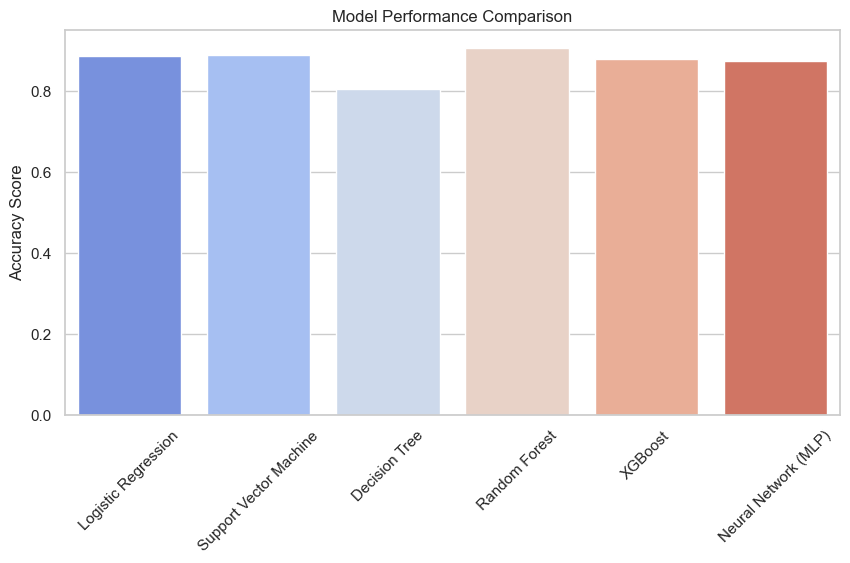

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()

En Yüksek Doğruluk Veren Model

In [ ]:
best_model_name = max(results, key=results.get)  # En iyi modelin ismini al
best_model = models[best_model_name]  # En iyi modelin kendisini al
print(f"En iyi model: {best_model_name} - Accuracy: {results[best_model_name]:.4f}")


✅ En iyi model: Random Forest - Accuracy: 0.9060


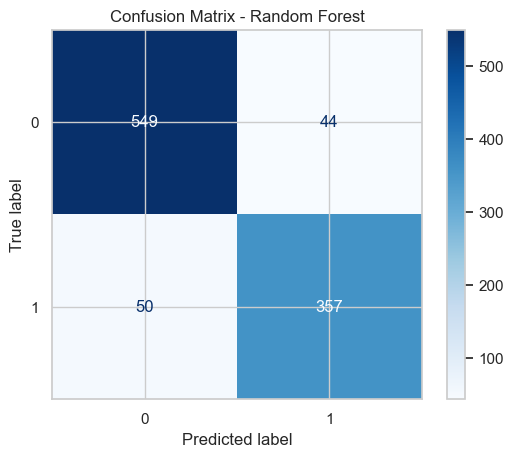

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test seti üzerinde tahmin yap
y_pred_best = best_model.predict(X_test_scaled)

# Karışıklık Matrisi oluştur ve görselleştir
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


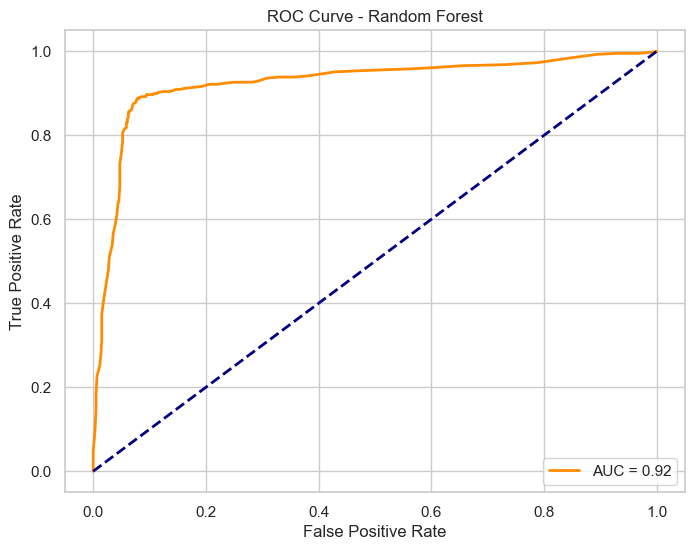

In [23]:
from sklearn.metrics import roc_curve, auc

# Modelin tahmin olasılıklarını al (destekleyen modeller için)
if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Sadece pozitif sınıfın olasılığı
else:
    y_prob = best_model.decision_function(X_test_scaled)  # SVM için

# ROC eğrisini çiz
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name}")
plt.legend(loc="lower right")
plt.show()


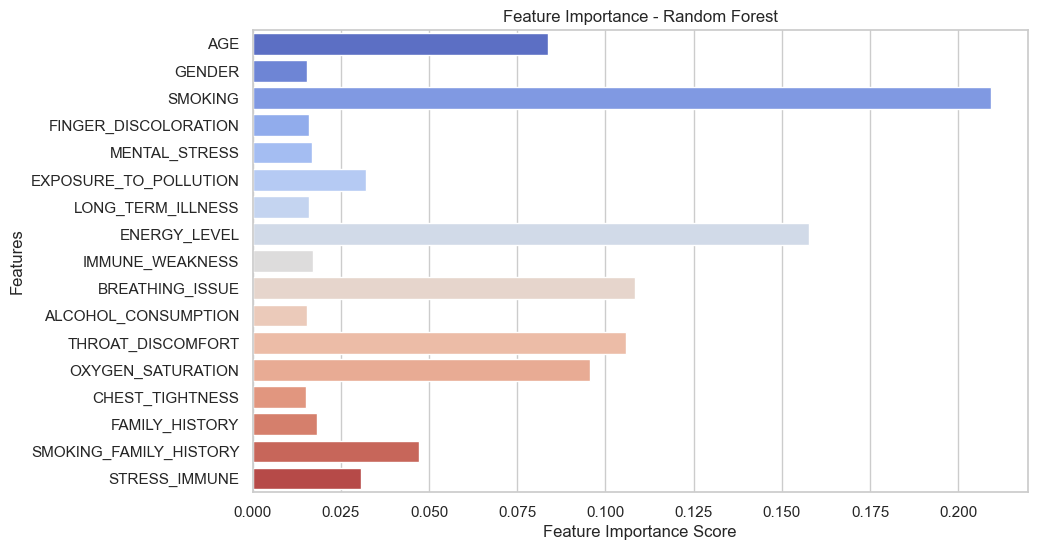

In [ ]:
if hasattr(best_model, "feature_importances_"):  # Model feature importance destekliyorsa
    feature_importance = best_model.feature_importances_
    feature_names = X.columns
    
    # Görselleştirme
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names, palette="coolwarm")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()
else:
    print("Bu modelde feature importance özelliği desteklenmiyor.")
